In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Data Simulation

Generate 1000 samples from two different classes of equal size
1. 500 samples from class 1 are generated here.

x_1 = [x_11, x_12]

In [2]:
Number_of_points = 1000

mean = [-2.5, -2.5]

cov = [[1, 0], [0, 1]]

X_data = np.random.multivariate_normal(mean, cov, Number_of_points//2)
# print(X_data)
print(X_data.shape)

(500, 2)


In [3]:
print(X_data)

[[-2.18020994 -1.10488882]
 [-2.65154063 -2.04216257]
 [-3.18321232 -2.27002258]
 [-1.8238731  -2.65554154]
 [-2.12708534 -1.86126098]
 [-3.18313879 -0.89088485]
 [-1.94339202 -3.15053701]
 [-2.30878913 -2.787122  ]
 [-0.96693056 -3.49787083]
 [-3.43264353 -2.51388934]
 [-1.87179432 -3.76054814]
 [-1.5268988  -2.33374011]
 [-1.86612853 -3.59558948]
 [-4.34922397 -1.09336967]
 [-2.17822364 -1.36448746]
 [-2.14206711 -0.71553768]
 [-2.58124476 -5.04628594]
 [-1.38363499 -3.00134189]
 [-2.25869346 -2.49203122]
 [-6.07567168 -1.64252558]
 [-0.89343124 -3.93903707]
 [-2.4893867  -0.51534902]
 [-2.79111151 -3.43427744]
 [-2.97144601 -4.92456507]
 [-3.0364291  -4.49314965]
 [-3.20950871 -1.08931013]
 [-3.08432843 -2.33739288]
 [-1.66367374 -1.54714603]
 [-3.20412684 -1.84709006]
 [-4.16007788 -1.96392358]
 [-3.87819139 -3.64730768]
 [-3.29136537 -3.05542775]
 [-3.80213144 -1.52545058]
 [-3.75337741 -5.70364926]
 [-3.27206979 -1.13769348]
 [-2.34100268 -3.02558948]
 [-1.02712403 -4.03771967]
 

2. A set of 500 samples from class 2 are generted here, by changing the mean of the cluster

In [4]:
mean = [2.5,2.5]
# Create samples from class 2 with the above mean. Concatenate the samples from class 1 and class 2.
X_data = np.concatenate((X_data,np.random.multivariate_normal(mean, cov, Number_of_points//2)))

## Add class to the points generated
Y_data = np.zeros((Number_of_points,))
Y_data[Number_of_points//2:] = 1

In [5]:
print(X_data)

[[-2.18020994 -1.10488882]
 [-2.65154063 -2.04216257]
 [-3.18321232 -2.27002258]
 ...
 [ 3.41919764  5.00905676]
 [ 2.9477103   2.13729113]
 [ 2.07973288  1.93954524]]


## Training and Test Set Creation

In [6]:
Number_of_training = int(Number_of_points*0.8)

Number_of_testing = int(Number_of_points*0.2)

## Randomly permute a sequence, or return a permuted range
index = np.random.permutation(Number_of_points)

In [7]:
np.random.permutation(10)

array([4, 7, 0, 6, 1, 3, 5, 2, 9, 8])

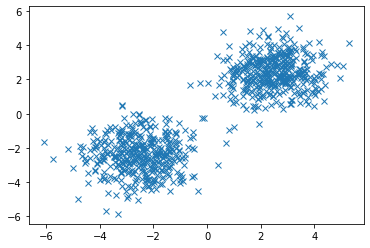

(800, 2) (800,)


In [8]:
X_train = X_data[index[:Number_of_training]] 

Y_train = Y_data[index[:Number_of_training]]

## Plots the points generated
plt.plot(X_train[:,0],X_train[:,1],'x')

plt.show()

print(X_train.shape,Y_train.shape)

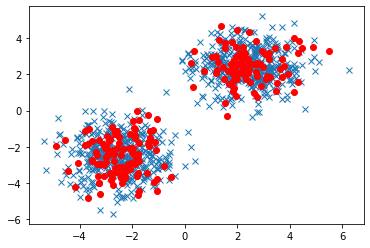

In [ ]:
X_test = X_data[index[Number_of_training:]]

Y_test = Y_data[index[Number_of_training:]]

## Plot train and test points in the same plot
plt.plot(X_train[:,0],X_train[:,1],'x')
## Add parameters for test points
plt.plot(X_test[:,0],X_test[:,1],'o',color='red')

plt.show()

## Learning a logisitc regression classifier

In [ ]:
# Import library
from sklearn.linear_model import LogisticRegression

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
## ## Please note the default values e.g L-2  regularization by default
clf = LogisticRegression(solver='lbfgs').fit(X_train, Y_train)

print("Accuracy on training data: %f"%(clf.score(X_train, Y_train)))

print("Accuracy on test data: %f"%(clf.score(X_test, Y_test)))

Accuracy on training data: 1.000000
Accuracy on test data: 1.000000


### Visualizing the decision boundary

In [ ]:
print(np.linspace(-5,5,10))

[-5.         -3.88888889 -2.77777778 -1.66666667 -0.55555556  0.55555556
  1.66666667  2.77777778  3.88888889  5.        ]


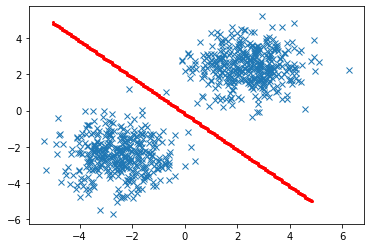

In [ ]:
eps = 0.0289
plt.plot(X_train[:,0],X_train[:,1],'x')

for i in np.linspace(-5,5,150):
    for j in np.linspace(-5,5,150):
        pred = clf.predict_proba([[i,j]])[0]
        if pred[0] >=  0.5 - eps and pred[0] <=0.5 + eps and pred[1] >=  0.5 - eps and pred[1] <=0.5+eps:
            plt.plot(i,j,'o',color = 'red',markersize=2)
    
plt.show()
        

In [ ]:
clf.predict_proba([[-2.5,-2.5]])[0]

array([9.99868885e-01, 1.31115005e-04])

## Iris Dataset - Multiclass Classification

In [ ]:

from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
print(X.shape)
print(y)

(150, 4)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [ ]:
print(list(load_iris().target_names))

['setosa', 'versicolor', 'virginica']


In [ ]:
print(X)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
## Create a model for Logistic Regression as done above
clf = LogisticRegression(penalty='l2', C=0.01, random_state=0, solver='lbfgs',multi_class='multinomial',max_iter=200).fit(X,y)

print(clf.predict(X[:2, :]))
## predict_proba gives the probability estimates
print(clf.predict_proba(X[:1, :])) 
print(clf.score(X, y))

[0 0]
[[0.71765738 0.21380817 0.06853445]]
0.8733333333333333


In [ ]:
new_observation = [[.5, .5, .5, .5]]
print(clf.predict(new_observation))
print(clf.predict_proba(new_observation))

NameError: ignored

## Digits dataset - Multiclass Classification

In [ ]:
from sklearn.datasets import load_digits
## Each image is of size 8 X 8
digits = load_digits()

In [ ]:
print("Image Data Shape" , digits.data.shape)# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


In [ ]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

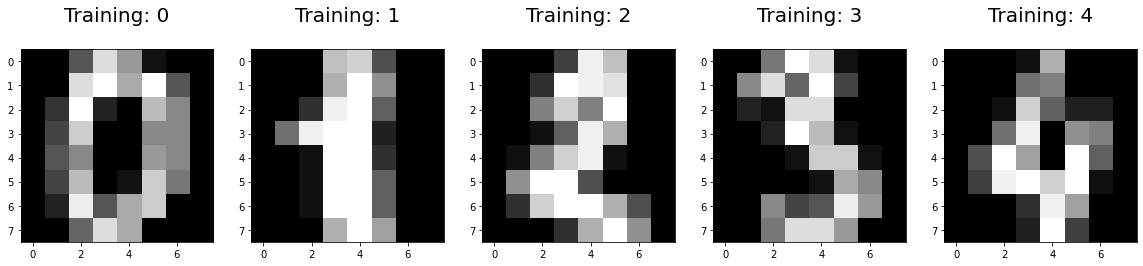

In [ ]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
from sklearn.model_selection import train_test_split
## Create a train test split with test size 75-25 split.
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=0)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=0)


##### Hyperparameter Tuning - Method *1*

In [ ]:
## Method 1 
C = [0.0001, 0.001, 0.01, 0.1, 0.5]
for each_C in C:
  logisticRegr = LogisticRegression(C = each_C)
  logisticRegr.fit(x_train, y_train)
  score = logisticRegr.score(x_val, y_val)
  print("For C value {}, the score obtained is {}".format(each_C, score))




For C value 0.0001, the score obtained is 0.9305555555555556
For C value 0.001, the score obtained is 0.96875
For C value 0.01, the score obtained is 0.9826388888888888
For C value 0.1, the score obtained is 0.9791666666666666
For C value 0.5, the score obtained is 0.9791666666666666


In [ ]:
logisticRegr = LogisticRegression(C = 0.01)
logisticRegr.fit(x_train, y_train)
test_score = logisticRegr.score(x_test, y_test)
print(test_score)

0.9638888888888889


##### Hyperparameter tuning - Method 2 - Grid Search CV

In [ ]:
## Method 2
from sklearn.model_selection import GridSearchCV
parameters = {'solver': ['newton-cg', 'lbfgs'], 'penalty':['l1', 'l2'], 'max_iter':[100, 500], 'C':[0.01, 0.1, 0.5]}
logisticRegr = LogisticRegression()
clf = GridSearchCV(logisticRegr, parameters)
clf.fit(x_train, y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1], 'max_iter': [100, 500],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs']})

In [ ]:
print(clf.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}


In [ ]:
score = clf.score(x_test, y_test)
print(score)

0.9583333333333334


Text(0.5, 15.0, 'Predicted')

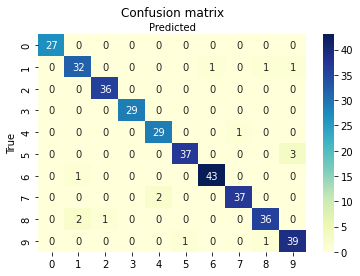

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y_pred = clf.predict(x_test)
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

labels = list(range(10))
fig, ax = plt.subplots()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, labels)
plt.yticks(tick_marks, labels)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True')
plt.xlabel('Predicted')

# Practice Session

## Heart Disease Prediction using Logistic Regression

https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci?resource=download&select=heart_cleveland_upload.csv

